In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [27]:
# reading data
dh =pd.read_csv("D:\project2\creditcard.csv") 
# showing the first five rows
dh.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
dh.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [29]:
# null values
dh.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [30]:
print(f'The information about the dataset:\n{dh.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
print(f'The type of columns:\n{dh.dtypes}')

The type of columns:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [32]:
print(f'The type of columns:\n{dh.dtypes}')

The type of columns:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [33]:
print(f'The description of dataset:\n{dh.describe(include="all").T}')

The description of dataset:
           count          mean           std         min           25%  \
Time    284807.0  9.481386e+04  47488.145955    0.000000  54201.500000   
V1      284807.0  1.168375e-15      1.958696  -56.407510     -0.920373   
V2      284807.0  3.416908e-16      1.651309  -72.715728     -0.598550   
V3      284807.0 -1.379537e-15      1.516255  -48.325589     -0.890365   
V4      284807.0  2.074095e-15      1.415869   -5.683171     -0.848640   
V5      284807.0  9.604066e-16      1.380247 -113.743307     -0.691597   
V6      284807.0  1.487313e-15      1.332271  -26.160506     -0.768296   
V7      284807.0 -5.556467e-16      1.237094  -43.557242     -0.554076   
V8      284807.0  1.213481e-16      1.194353  -73.216718     -0.208630   
V9      284807.0 -2.406331e-15      1.098632  -13.434066     -0.643098   
V10     284807.0  2.239053e-15      1.088850  -24.588262     -0.535426   
V11     284807.0  1.673327e-15      1.020713   -4.797473     -0.762494   
V12     28

In [34]:
# showing if there dublicated values or not
dh.drop(columns='Class',axis=1).duplicated().sum()

1081

In [35]:
dh.shape

(284807, 31)

-------------DATA WRANGLING------------

In [36]:
dh['Class'].value_counts() #imbalance

Class
0    284315
1       492
Name: count, dtype: int64

In [37]:
scaler=StandardScaler()
# Reshape the 'Time' and 'Amount' columns
scaled_time = scaler.fit_transform(dh['Time'].values.reshape(-1, 1))
scaled_amount = scaler.fit_transform(dh['Amount'].values.reshape(-1, 1))

# Create new DataFrame with scaled values
scaled_df = pd.DataFrame({
    'Scaled_Time': scaled_time.flatten(),
    'Scaled_Amount': scaled_amount.flatten()
})

# For Displaying the first few rows of the scaled DataFrame
print(scaled_df.head())

   Scaled_Time  Scaled_Amount
0    -1.996583       0.244964
1    -1.996583      -0.342475
2    -1.996562       1.160686
3    -1.996562       0.140534
4    -1.996541      -0.073403


EDA

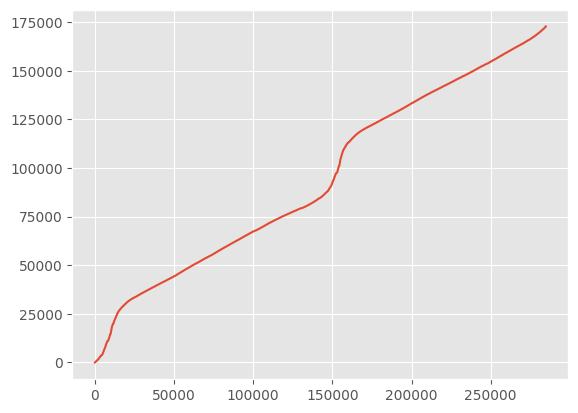

In [38]:
dh['Time'].plot()
plt.show()

c:\Users\vinay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\vinay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


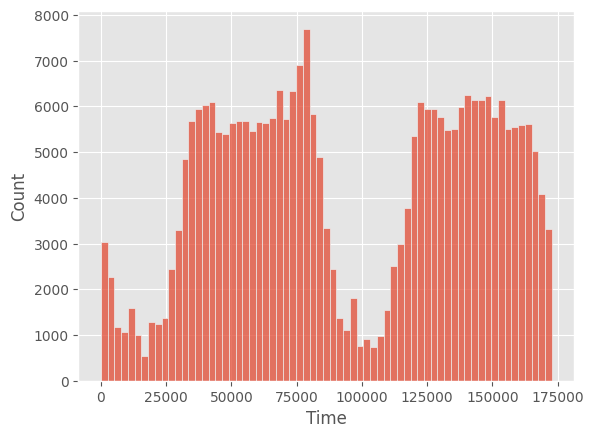

In [39]:
ax = sns.histplot(data=dh, x='Time')  
plt.show()

<Axes: title={'center': 'Correlation with Class '}>

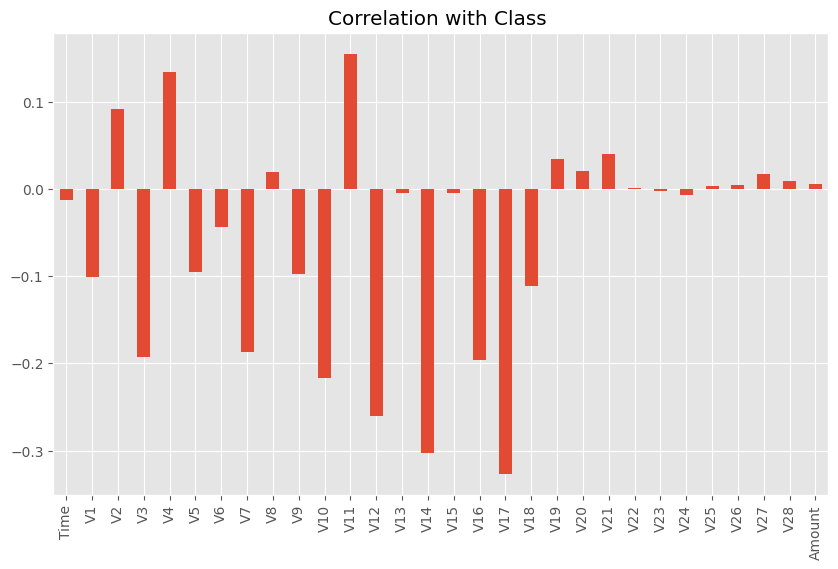

In [40]:
dh.drop('Class',axis=1).corrwith(dh.Class).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Class ")

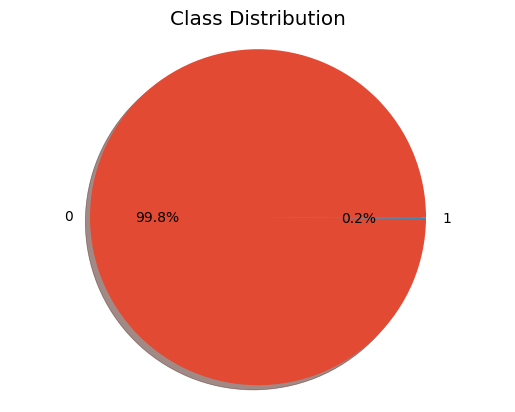

In [41]:
plt.pie(dh['Class'].value_counts().values,autopct='%1.1f%%',labels=dh['Class'].value_counts().index,shadow=True)
plt.axis('equal') 
plt.title('Class Distribution')
plt.show()

Split DataSet


In [42]:
x=dh.drop(columns='Class',axis=1)
y=dh['Class']

ru=RandomUnderSampler(random_state=0)

sampled_x,sampled_y=ru.fit_resample(x,y)
sampled_x.shape,sampled_y.shape

((984, 30), (984,))

In [43]:
x_train,x_test,y_train,y_test=train_test_split(sampled_x,sampled_y,test_size=0.3,random_state=45)
print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (688, 30)
the shape of x_test is : (296, 30)
the shape of y_tain is : (688,)
the shape of y_test is (296,)


Models 
 
1 . RandomForestClassifier

In [44]:
rf=RandomForestClassifier()
model1=rf.fit(x_train,y_train)
y_pred=model1.predict(x_test)

print(f'classification report :{classification_report(y_test,y_pred)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred)}')

classification report :              precision    recall  f1-score   support

           0       0.92      1.00      0.96       143
           1       1.00      0.92      0.96       153

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296

*************************************
confusion matrix :[[143   0]
 [ 13 140]]
*************************************
accuracy score :0.956081081081081


support vector machine

In [45]:

svm=SVC()
model3=svm.fit(x_train,y_train)
y_pred3=model3.predict(x_test)


print(f'classification report :{classification_report(y_test,y_pred3)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred3)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred3)}')


classification report :              precision    recall  f1-score   support

           0       0.50      0.85      0.63       143
           1       0.61      0.22      0.32       153

    accuracy                           0.52       296
   macro avg       0.56      0.53      0.48       296
weighted avg       0.56      0.52      0.47       296

*************************************
confusion matrix :[[122  21]
 [120  33]]
*************************************
accuracy score :0.5236486486486487


Logistic RegraSSION

In [46]:
lr=LogisticRegression(max_iter=1000)
model2=lr.fit(x_train,y_train)
y_pred2=model2.predict(x_test)


print(f'classification report :{classification_report(y_test,y_pred2)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred2)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred2)}')

classification report :              precision    recall  f1-score   support

           0       0.91      0.97      0.94       143
           1       0.97      0.91      0.94       153

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

*************************************
confusion matrix :[[139   4]
 [ 14 139]]
*************************************
accuracy score :0.9391891891891891
